In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\20208463\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20208463\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Import tweepy to work with the twitter API
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

In [3]:
consumer_key = 'YNyiyE5ibJ86TbhBDoFCpEsBu'
consumer_secret = 'cE63ZCAiiNBYogYUNwjwGgB2jOVBxvZkkPOfwm7SPMa6Eocb6V'
access_token = '748789075-E190Pda4cc7GQr4KQyUczGy9QtoMMPiSEkEm5uKP'
access_token_secret = 'aAlExkHR84ij1SQpw3wZpsBg1WCNxYv5yUWchyDHya8YN'

In [4]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
cursor = tw.Cursor(api.user_timeline, id = 'AOC', tweet_mode = "extended").items(1000)

In [6]:
tweets = [{'Tweet':tweet.full_text} for tweet in cursor]
print(tweets)

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


[{'Tweet': '@FunWithTeeth Hey there, this is awful and unacceptable. Can you contact my Congressional office? You can even call and leave a voicemail tonight so we can get back you ASAP tomorrow'}, {'Tweet': 'There are so, so many details like these linking BIF &amp; BBB.\n\nWe can’t just say “oh there’s X million for this!” Does X million actually get it done or is it half a bridge?\n\nHow many times has leg been rushed just for people to be resentful at details later? Let’s do this right.'}, {'Tweet': 'So for those who like to call folks like me naïve, immature, or that “I don’t know what I’m doing”- some of us actually read the text while others get hustled by spin.\n\nDetails matter. On climate, they’re life+death. So to do my job, I need more than an IOU. Not too much to ask.'}, {'Tweet': 'Now for folks who say “you need to compromise”: to start, I do not support blue hydrogen. I am against expanding it.\n\nThe compromise is allowing blue hydrogen w/ the drawdown provisions in BBB

In [7]:
df_tweet = pd.DataFrame.from_dict(tweets)
df_tweet.head()

,Tweet
0,"@FunWithTeeth Hey there, this is awful and una..."
1,"There are so, so many details like these linki..."
2,So for those who like to call folks like me na...
3,Now for folks who say “you need to compromise”...
4,Passing BIF w/o BBB makes our emissions &amp; ...


In [8]:

# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob



In [19]:
stop_words = stopwords.words('english')
custom_stopwords = ['RT','aoc','amp']

In [20]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df_tweet['Tweet'] = df_tweet['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df_tweet.head()

,Tweet
0,"@FunWithTeeth Hey there, awful unacceptable. C..."
1,"There so, many detail like linking BIF &amp; B..."
2,"So like call folk like naïve, immature, “I don..."
3,"Now folk say “you need compromise”: start, I s..."
4,Passing BIF w/o BBB make emission &amp; climat...


In [21]:
df1 = df_tweet.to_string()

df_split = df1.split()

df_split

all_sentences = []

for word in df_split:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

In [22]:
#print(lines)

In [23]:
import re

In [24]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        word = word.lower()
        lines2.append(word)
            

In [25]:
# #This is stemming the words to their root
# from nltk.stem.snowball import SnowballStemmer

# # The Snowball Stemmer requires that you pass a language parameter
# s_stemmer = SnowballStemmer(language='english')

# stem = []
# for word in lines2:
#     stem.append(s_stemmer.stem(word))
    
# #stem

In [26]:
#Removing all Stop Words

stem2 = []

stem = lines2 # Remove this if you want stemming

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

#stem2

In [27]:
df_count = pd.DataFrame(stem2)

df_count = df_count[0].value_counts()

In [28]:
df_count.head()

aoc       81
people    33
new       32
thank     31
amp       30
Name: 0, dtype: int64

In [29]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

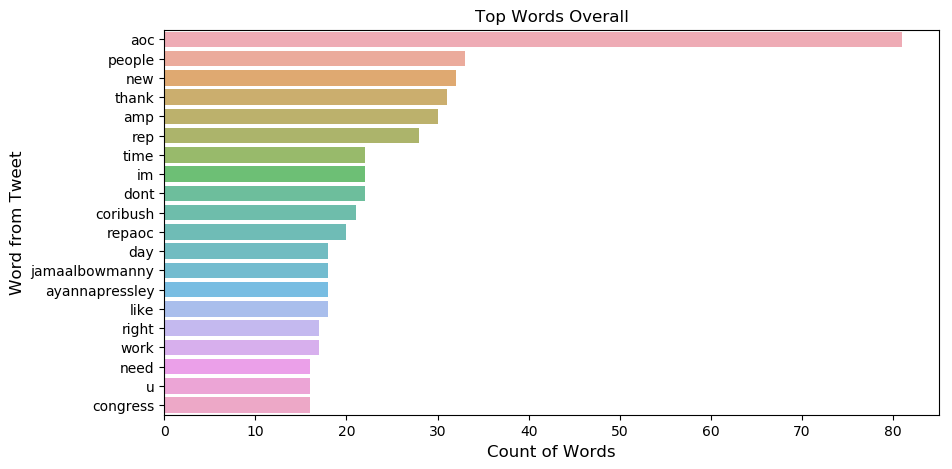

In [30]:

#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df_count = df_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_count.values, df_count.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [31]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [32]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [33]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

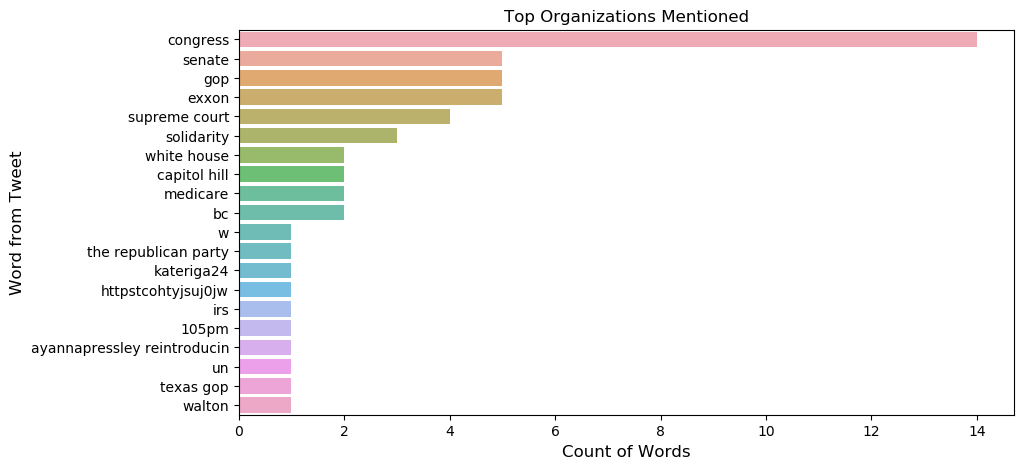

In [34]:
df_count = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_count.values, df_count.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [35]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

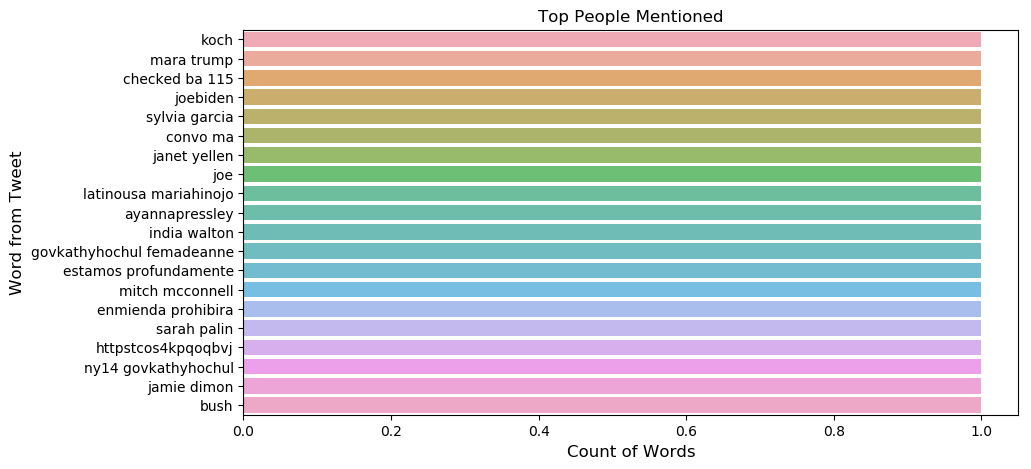

In [36]:
df_count = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_count.values, df_count.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [37]:
df_tweet.head()

,Tweet
0,"@FunWithTeeth Hey there, awful unacceptable. C..."
1,"There so, many detail like linking BIF &amp; B..."
2,"So like call folk like naïve, immature, “I don..."
3,"Now folk say “you need compromise”: start, I s..."
4,Passing BIF w/o BBB make emission &amp; climat...


In [38]:
df_tweet['polarity'] = df_tweet['Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df_tweet['subjectivity'] = df_tweet['Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [39]:
df_tweet.head()

,Tweet,polarity,subjectivity
0,"@FunWithTeeth Hey there, awful unacceptable. C...",-0.500000,0.500000
1,"There so, many detail like linking BIF &amp; B...",0.207341,0.300397
2,"So like call folk like naïve, immature, “I don...",-0.050000,0.150000
3,"Now folk say “you need compromise”: start, I s...",0.000000,0.100000
4,Passing BIF w/o BBB make emission &amp; climat...,0.133766,0.459127


In [40]:
def getAnalysis(score):
    if score < 0:
        return '‘Negative’'
    elif score == 0:
        return '‘Neutral’'
    else:
        return '‘Positive’'
df_tweet['TextBlob_Analysis'] = df_tweet['polarity'].apply(getAnalysis)

In [41]:
df_tweet.head()

,Tweet,polarity,subjectivity,TextBlob_Analysis
0,"@FunWithTeeth Hey there, awful unacceptable. C...",-0.500000,0.500000,‘Negative’
1,"There so, many detail like linking BIF &amp; B...",0.207341,0.300397,‘Positive’
2,"So like call folk like naïve, immature, “I don...",-0.050000,0.150000,‘Negative’
3,"Now folk say “you need compromise”: start, I s...",0.000000,0.100000,‘Neutral’
4,Passing BIF w/o BBB make emission &amp; climat...,0.133766,0.459127,‘Positive’


In [42]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Tweet                1000 non-null object
polarity             1000 non-null float64
subjectivity         1000 non-null float64
TextBlob_Analysis    1000 non-null object
dtypes: float64(2), object(2)
memory usage: 31.3+ KB


In [43]:
df_tweet_count = df_tweet['TextBlob_Analysis'].value_counts()

In [44]:
df_tweet_count

‘Positive’    485
‘Neutral’     337
‘Negative’    178
Name: TextBlob_Analysis, dtype: int64

In [45]:
df_tweet['polarity'].mean()

0.09803802826736759

In [46]:
df_tweet['subjectivity'].mean()

0.3633656404630422